In [1]:
import numpy as np
from matplotlib import pyplot as plt
from src.FireFramework import * # importieren des Frameworks

import utility.animation_utility as anim
import utility.io_utility as io

## Beispielhafte Verwendung des Frameworks

In [2]:
# Liste der pro Zelle zu speichernden Werte
params = ["fuel","fire"]

# Relativvektoren der zu betrachtenen Nachbarn
relative_neighbours = [(-1,0),(1,0),(0,1),(0,-1),(-1,1),(1,1),(-1,-1),(1,-1)] 


# Ein Startfeld (Zeile, Spalte) -> liste.
# Liefert die Anfangsparameter (Reihenfolge wie oben in "params" spezifiziert)
def initial_field(row, col):
    fuel = 0.9
    burn = 0
    if row == 20 and col == 20: burn = 1
    
    return [fuel, burn] # Hier der Anfangswert-return


# Die Zustandsübergangs-funktion:
#
# cellState: enthält den aktuellen Status der Zelle
# die Werte können mittels cellState.getParam(name) erhalten werden.
#
# neighbourStates: liste. Enthält eine Liste (Anzahl der jeweiligen Nachbarn berücksichtigt) mit Statusobjekten der Nachbarn.
# Die Werte der Nachbarn aus neighbourStates = [n1, n2, ...] können mithilfe von n1.getParam(name) erhalten werden.
# Außerdem kann man von jedem Nachbarn die Relativposition erhalten: n1.getRelativeVector() = (dx, dy)
# (Diese Information wurde in "relative_neighbour" (s.o.) festgelegt)
#
# returnState: Dies ist der Status der jeweiligen Zelle nach dem Update. Er verfügt deshalb noch über zwei weitere Methoden:
# returnState.setParam(name, value) setzt den zukünftigen Status der Zelle
# returnState.addToParam(name, delta) adiert auf den alten Wert des Zellstatus ein delta auf. (convenient)
# Wird ein Wert nicht verändert muss nichts getan werden. Der alte wird dann beibehalten.
# Es ändert sich nur etwas wenn setParam() oder addToParam() aufgerufen wird.
# 
# Mann muss nichts returnen. Die Änderungen erfolgen durch Aufruf der obigen Methoden.
#
def transition(cellState, neighbourStates, returnState):
    #Beispiel
    p_burn = 1/8 * sum([n.getParam("fire") for n in neighbourStates]) #Anteil der brennenden Nachbarzellen
    p_stop = (1 - cellState.getParam("fuel")) ** 8  #Erlöschen bei wenig Brennwert
    
    if p_burn >= np.random.uniform():
        returnState.setParam("fire", 1)
        
    if p_stop >= np.random.uniform():
        returnState.setParam("fire", 0)
        
    returnState.addToParam("fuel", -0.01*cellState.getParam("fire")) # Verringerung des Brennwerts

# Hier wird das Gitter erzeugt und die oben definierten Parameter übergeben..
g = Grid(50,50,params, relative_neighbours, transition, initial_field)

In [3]:
# Läuft 100 Iterationen durch und gibt das ganze Feld (mit zeitlicher Entwicklung) zurück.
result = g.runModel(100)

1%
11%
21%
31%
41%
51%
61%
71%
81%
91%


In [4]:
result.shape
# (Zeit, Row, Col, Parameter)

(100, 50, 50, 2)

In [5]:
# save data:
io.write(result, "data/result_output")

<IPython.core.display.Javascript object>


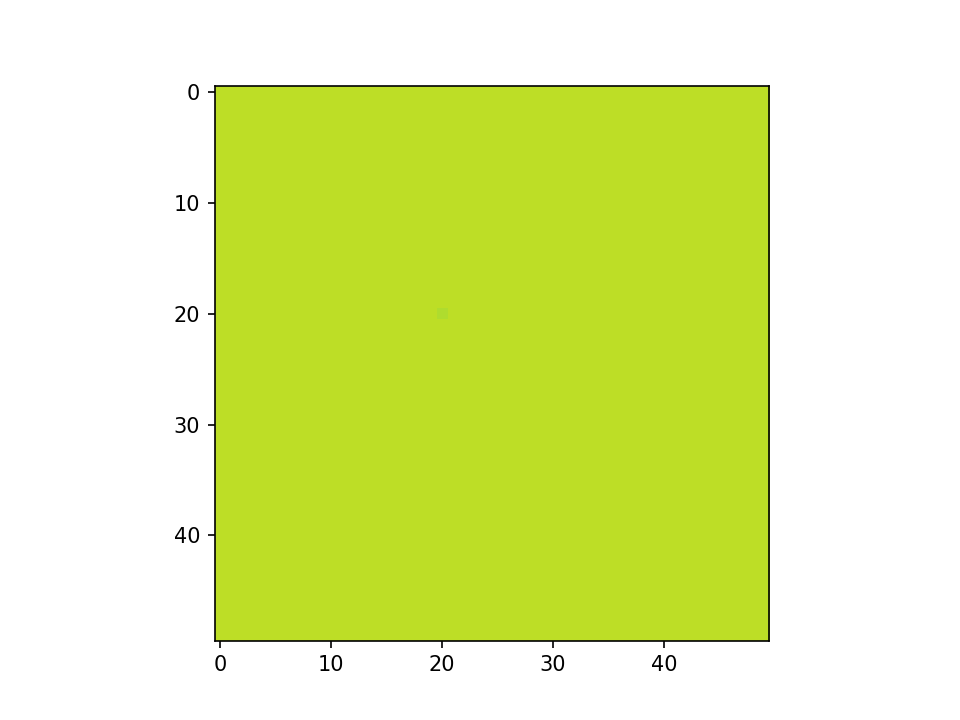

In [6]:
%matplotlib notebook
anim.animate("data/result_output", 0)